In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
file_path = "/Users/akopiichenko/Desktop/Netflix_IMDB_Scores/Netflix_TV_Shows_and_Movies.csv"
netflix = pd.read_csv(file_path)

Text(0.5, 1.0, 'Percentage of NaN for each column in Netflix dataset')

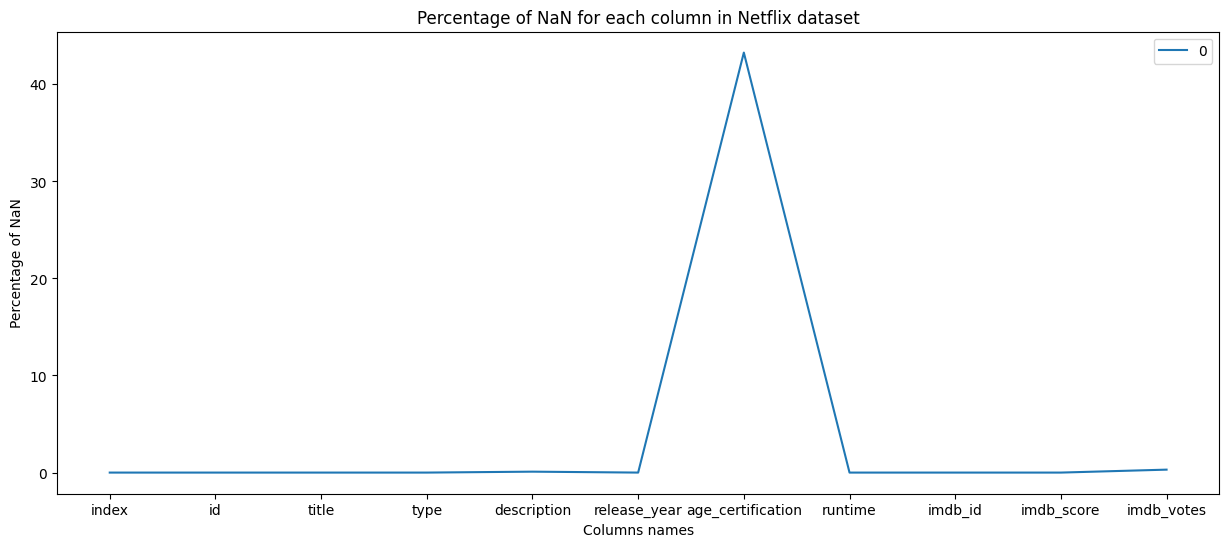

In [54]:
"""Defining percentage on NaN in columns"""

# Calculating amount of NaN in each column
sum_NaN = netflix.isna().sum()

# Calculating total amount of rows
columns_totals = len(netflix)

# Calculating percentage of NaN in each column
percentage_NaN = sum_NaN / columns_totals * 100

# Transforming series into dataframe
percentage_NaN = percentage_NaN.to_frame()

# Setting size of the chart
plt.figure(figsize=(15, 6)) 

# Building histogram for distribution of NaN
sns.lineplot(percentage_NaN)

# Renaming X, Y axes, title
plt.xlabel("Columns names")
plt.ylabel("Percentage of NaN")
plt.title("Percentage of NaN for each column in Netflix dataset")

In [55]:
"""Checking existence of duplicates"""

# 1st method
duplicates = netflix.duplicated()
print(duplicates.sum())

# 2nd method
print(netflix.shape[0])
print(netflix.drop_duplicates().shape[0])

0
5283
5283


Statistic: 519.1704687894171, Critical Values: [0.576 0.656 0.786 0.917 1.091], Significance Levels: [15.  10.   5.   2.5  1. ]


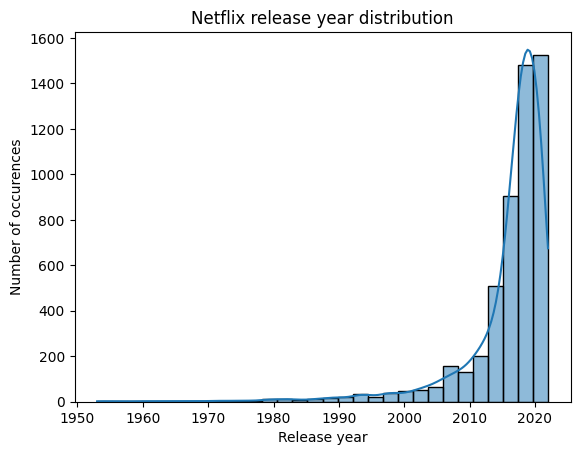

In [56]:
"""Checking normal distribution for release year"""

# Buildding histogram
sns.histplot(netflix['release_year'], kde=True, bins=30)

# Renaming X, Y axes, title
plt.xlabel("Release year")
plt.ylabel("Number of occurences")
plt.title("Netflix release year distribution")

# Checking normal distribution for release_year column using Anderson coefficient
from scipy.stats import anderson

result = anderson(netflix['release_year'])
print(f'Statistic: {result.statistic}, Critical Values: {result.critical_values}, Significance Levels: {result.significance_level}')

# A smaller test statistic and higher critical values suggest that the data follows a normal distribution.

Text(0.5, 1.0, 'Netflix runtime distribution')

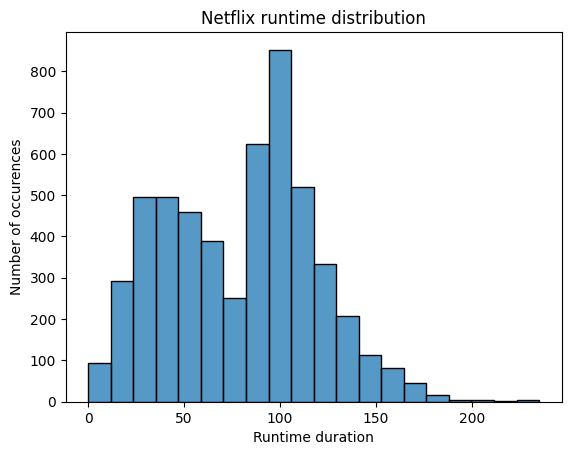

In [57]:
"""Checking normal distribution for runtime"""

# Building histogram for runtime column
sns.histplot(netflix['runtime'], bins=20)

# Renaming X, Y axes, title
plt.xlabel("Runtime duration")
plt.ylabel("Number of occurences")
plt.title("Netflix runtime distribution")


Text(0.5, 1.0, "Netflix show's runtime distribution")

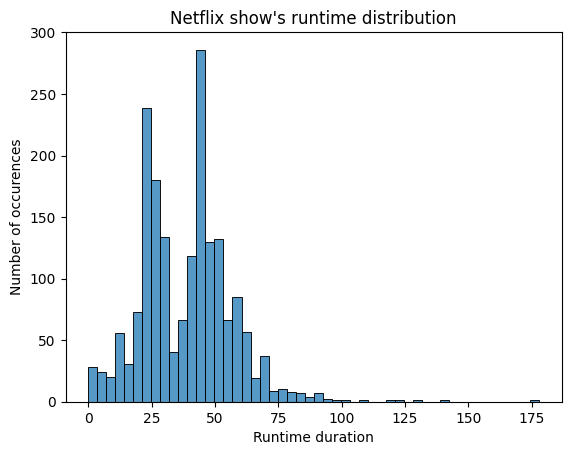

In [58]:
"""Building histogram for runtime for shows"""

# Filtering Netflix dataframe by type 'SHOW'
shows = netflix.loc[netflix.type == 'SHOW']

# Building histogram for runtime of 'SHOW' type
sns.histplot(shows['runtime'], bins=50)

# Renaming X, Y axes, title
plt.xlabel("Runtime duration")
plt.ylabel("Number of occurences")
plt.title("Netflix show's runtime distribution")


Text(0.5, 1.0, "Netflix movies' runtime distribution")

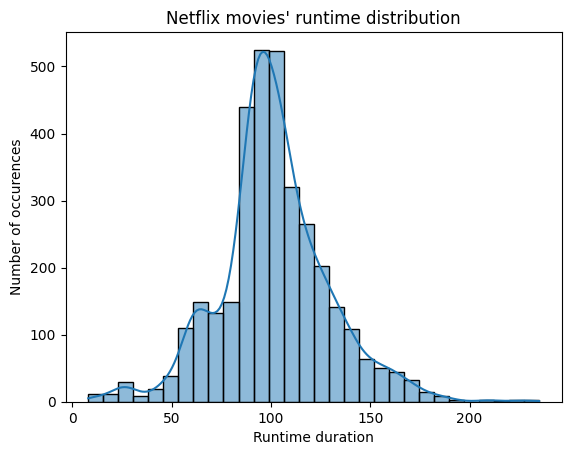

In [59]:
"""Building histogram for runtime for movies"""

# Filtering Netflix dataframe by type 'MOVIE'
movies = netflix.loc[netflix.type == 'MOVIE']

# Building histogram for runtime of 'MOVIE' type
sns.histplot(movies['runtime'], kde = True, bins=30)

# Renaming X, Y axes, title
plt.xlabel("Runtime duration")
plt.ylabel("Number of occurences")
plt.title("Netflix movies' runtime distribution")

Text(0.5, 1.0, 'Netflix IMDB score distribution')

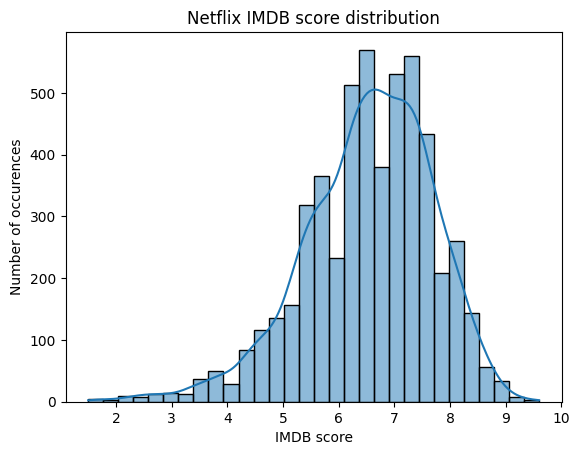

In [60]:
"""Checking normal distribution for imdb_score"""

# Building histogram for imdb_score
sns.histplot(netflix['imdb_score'], kde=True, bins=30)

# Renaming X, Y axes, title
plt.xlabel("IMDB score")
plt.ylabel("Number of occurences")
plt.title("Netflix IMDB score distribution")

Text(0.5, 1.0, 'Netflix IMDB score groups distribution')

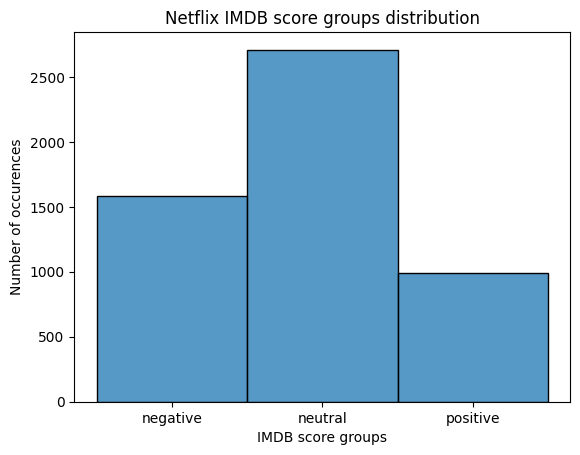

In [61]:
"""Cutting imdb_score into groups - 1-6 negative, 7-8 neutral, 9-10 positive"""

# Creating new column of IMDB score groups
netflix['imdb_score_groups'] = pd.cut(netflix['imdb_score'], bins=[1, 6, 7.5, float('inf')], labels=['negative', 'neutral', 'positive'])

# Building histogram for imdb_score
sns.histplot(netflix['imdb_score_groups'])

# Renaming X, Y axes, title
plt.xlabel("IMDB score groups")
plt.ylabel("Number of occurences")
plt.title("Netflix IMDB score groups distribution")

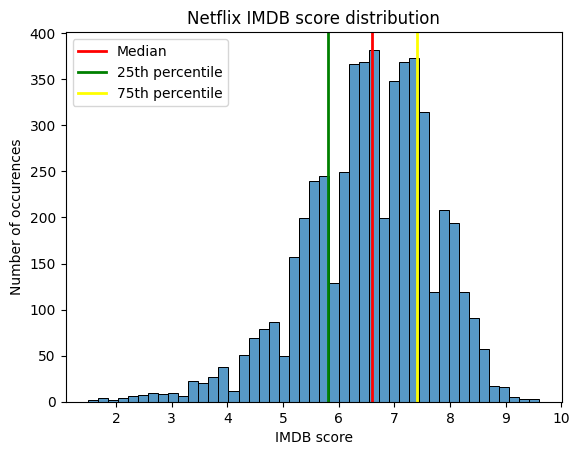

In [62]:
"""Dividing imdb_score column occurences into percentiles"""

# Building histogram for imdb_score
sns.histplot(netflix['imdb_score'])

# Adding percentiles lines
plt.axvline(netflix['imdb_score'].median(), color="red", linewidth=2, label="Median")
plt.axvline(np.percentile(netflix['imdb_score'], 25), color="green", linewidth=2, label="25th percentile")
plt.axvline(np.percentile(netflix['imdb_score'], 75), color="yellow", linewidth=2, label="75th percentile")

# Renaming X, Y axes, title, legend
plt.xlabel("IMDB score")
plt.ylabel("Number of occurences")
plt.title("Netflix IMDB score distribution")
plt.legend()

Text(0.5, 1.0, 'Netflix IMDB votes distribution')

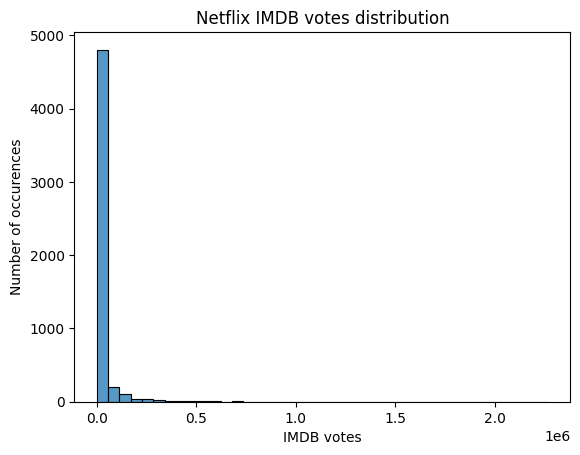

In [63]:
"""Checking normal ditribution for imdb_votes"""

# Building histogram for imdb_votes
sns.histplot(netflix['imdb_votes'], bins=40)

# Renaming X, Y axes, title
plt.xlabel("IMDB votes")
plt.ylabel("Number of occurences")
plt.title("Netflix IMDB votes distribution")

Text(0.5, 1.0, 'Netflix IMDB votes groups distribution')

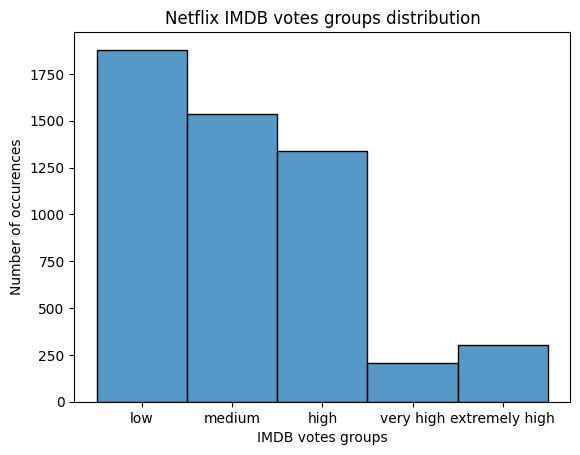

In [64]:
"""Cutting imdb_votes into groups"""

# Creating new column IMDB votes groups
netflix['imdb_votes_groups'] = pd.cut(netflix['imdb_votes'], bins=[0, 1000, 5000, 50000, 100000, float('inf')], labels=['low', 'medium', 'high', 'very high', 'extremely high'])

# Building histogram for IMDB votes groups
sns.histplot(netflix['imdb_votes_groups'])

# Renaming X, Y axes, title
plt.xlabel("IMDB votes groups")
plt.ylabel("Number of occurences")
plt.title("Netflix IMDB votes groups distribution")

Text(0.5, 1.0, 'Age certifications distribution')

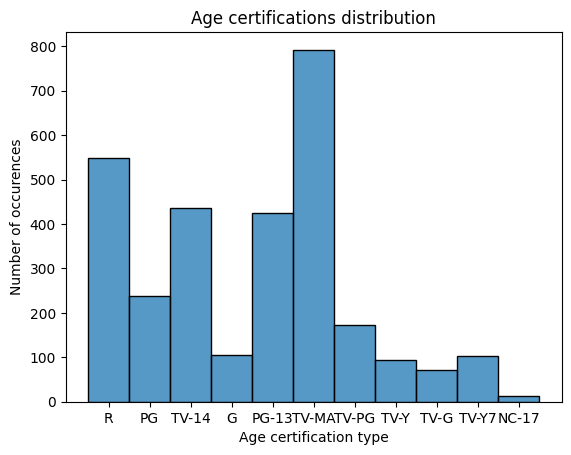

In [65]:
"""Building  histogram for age_certification column"""

# Building histogram for IMDB votes groups
sns.histplot(netflix['age_certification'])

# Renaming X, Y axes, title
plt.xlabel("Age certification type")
plt.ylabel("Number of occurences")
plt.title("Age certifications distribution")

([<matplotlib.patches.Wedge at 0x289971460>,
 [Text(0.7424170785783386, 0.8116753547048261, 'R'),
  Text(-0.6773084583786779, 0.8667486672667567, 'PG'),
  Text(-1.0916013205912067, -0.1356707665030825, 'TV-14'),
  Text(-0.5711567072987844, -0.9400957481595217, 'G'),
  Text(0.1619382428338808, -1.0880147083141272, 'PG-13'),
  Text(0.6004237631557198, -0.92167852564651, 'TV-MA'),
  Text(0.8390985325592166, -0.7112760734461476, 'TV-PG'),
  Text(0.9735894001523638, -0.511980155778484, 'TV-Y'),
  Text(1.0581751371363817, -0.3004419730104298, 'TV-G'),
  Text(1.0942048188974576, -0.11276441948408251, 'TV-Y7'),
  Text(1.0998979391323815, -0.014984107992813226, 'NC-17')],
 [Text(0.4049547701336392, 0.44273201165717785, '26.4%'),
  Text(-0.3694409772974606, 0.4727720003273218, '18.3%'),
  Text(-0.5954189021406581, -0.07400223627440862, '14.5%'),
  Text(-0.31154002216297333, -0.5127794989961026, '14.1%'),
  Text(0.08832995063666224, -0.593462568171342, '7.9%'),
  Text(0.3275038708122107, -0.50273

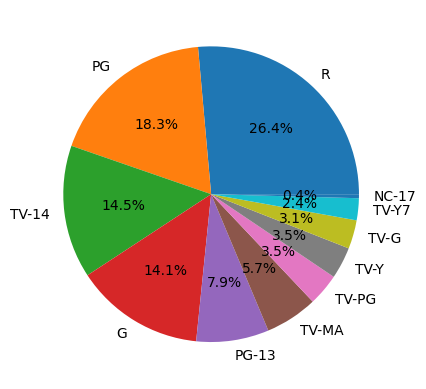

In [66]:
"""Building piechart for age_certification column"""

# Checking unique age certification types
unique_age_certifications = netflix.age_certification.dropna().unique()

# Calculating occurences and percentage for each age cerfitication type
age_certification_counts = netflix.age_certification.value_counts()
age_certification_percentage = (age_certification_counts / len(netflix)) * 100

# Building piechart for Age certification column
plt.pie(age_certification_percentage, labels=unique_age_certifications, autopct='%1.1f%%')

Text(0.5, 1.0, 'Content types distribution')

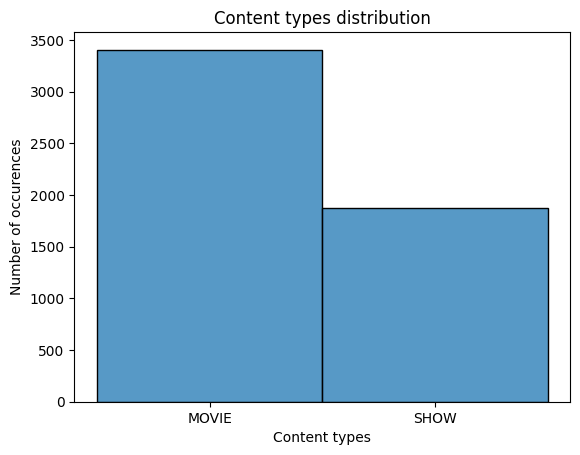

In [67]:
"""Bulding histogram  for type of content"""

# Building histogram for type of content
sns.histplot(netflix['type'])

# Renaming X, Y axes, title
plt.xlabel("Content types")
plt.ylabel("Number of occurences")
plt.title("Content types distribution")

In [68]:
""" Correlation for numerical columns in Netflix dataframe """

"""
The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables.
Its values can range from -1 to 1. 
Values between 0.7 and 1.0 (−0.7 and −1.0) indicate a strong positive (negative) linear relationship through a firm linear rule.

"""

# Creating Netflix dataframe only with numerical data
numerical_columns = ['release_year','runtime','imdb_score', 'imdb_votes']
numerical_netflix = netflix[numerical_columns]

# Calculating correlation coefficient
numerical_netflix.corr()

# Bulding chart for visualization of correlation for numerical_netflix
sns.swarmplot(numerical_netflix)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x16a01b380> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 